In [1]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession

# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [7]:
%%timeit
df = spark.read.csv('work/vermont_vendor_payments.csv', header='true', inferSchema = True)

1.33 s ± 68.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
df = df.withColumn("Amount", df["Amount"].cast("double"))

In [9]:
df.show()

+--------------+--------------------+------+-------------+--------------------+------------+-----+--------------------+----------+---------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|        City|State|  DeptID Description|    DeptID|   Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+------------+-----+--------------------+----------+---------+--------------------+------+--------------------+-----+
|    12/31/2019|Vt Housing & Cons...|  9150|   0000002188|Vermont Housing &...|  Montpelier|   VT|               Trust|9150120000|1075000.0|Transfer Out - Co...|720010|Housing & Conserv...|90610|
|    12/31/2019|Vt Housing & Cons...|  9150|   0000375660|Wagner Developmen...| Brattleboro|   VT|             VT REDI|9150293000|   4612.5|Other Direct Gran...|552990|Housing & Conserv...|90610|
|    12/31/2019|Vt H

In [10]:
%%timeit
df_pandas = pd.read_csv('work/vermont_vendor_payments.csv', low_memory = False)

2.99 s ± 50.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
columns = df.columns
print('The column Names are:')
for i in columns:
    print(i)

The column Names are:
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [12]:
print('The total number of columns is:', df.count(), '\nThe total number of rows is:', len(df.columns))

The total number of columns is: 1714538 
The total number of rows is: 14


In [13]:
df.describe().show()

+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+
|summary|Quarter Ending|          Department|            UnitNo|     Vendor Number|              Vendor|    City|             State|DeptID Description|              DeptID|              Amount|             Account|            AcctNo|    Fund Description|                Fund|
+-------+--------------+--------------------+------------------+------------------+--------------------+--------+------------------+------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+
|  count|       1714538|             1714538|           1714538|           1714538|             1714538|  972215|           1714490|           1714001|             1714538|

In [14]:
df.head()

Row(Quarter Ending='12/31/2019', Department='Vt Housing & Conserv Board', UnitNo=9150, Vendor Number='0000002188', Vendor='Vermont Housing & Conservation Board', City='Montpelier', State='VT', DeptID Description='Trust', DeptID='9150120000', Amount=1075000.0, Account='Transfer Out - Component Units', AcctNo='720010', Fund Description='Housing & Conserv Trust Fund', Fund='90610')

In [15]:
df.show(5)

+--------------+--------------------+------+-------------+--------------------+-----------+-----+-------------------+----------+---------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|       City|State| DeptID Description|    DeptID|   Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+-----------+-----+-------------------+----------+---------+--------------------+------+--------------------+-----+
|    12/31/2019|Vt Housing & Cons...|  9150|   0000002188|Vermont Housing &...| Montpelier|   VT|              Trust|9150120000|1075000.0|Transfer Out - Co...|720010|Housing & Conserv...|90610|
|    12/31/2019|Vt Housing & Cons...|  9150|   0000375660|Wagner Developmen...|Brattleboro|   VT|            VT REDI|9150293000|   4612.5|Other Direct Gran...|552990|Housing & Conserv...|90610|
|    12/31/2019|Vt Housing & C

In [16]:

# the .version attribute prints the spark version
print("the spark version is: %s" % spark.version)

the spark version is: 3.1.1


In [17]:
df.createOrReplaceTempView('VermontVendor')
spark.sql(
'''
SELECT `Quarter Ending` as Date, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

+----------+--------------------+---------+-----+
|      Date|          Department|   Amount|State|
+----------+--------------------+---------+-----+
|12/31/2019|Vt Housing & Cons...|1075000.0|   VT|
|12/31/2019|Vt Housing & Cons...|   4612.5|   VT|
|12/31/2019|Vt Housing & Cons...|112916.67|   VT|
|12/31/2019|Vt Housing & Cons...| 17152.74|   VT|
|12/31/2019|Vt Housing & Cons...|   4850.0|   VT|
|12/31/2019|Vt Housing & Cons...|   1755.0|   VT|
|12/31/2019|Vt Housing & Cons...| 26837.54|   VT|
|12/31/2019|Vt Housing & Cons...| 30396.35|   VT|
|12/31/2019|Vt Housing & Cons...|  5430.17|   VT|
|12/31/2019|Vt Housing & Cons...|   1000.0|   VT|
+----------+--------------------+---------+-----+



In [18]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+---------+-----+
|Quarter Ending|          Department|   Amount|State|
+--------------+--------------------+---------+-----+
|    12/31/2019|Vt Housing & Cons...|1075000.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   4612.5|   VT|
|    12/31/2019|Vt Housing & Cons...|112916.67|   VT|
|    12/31/2019|Vt Housing & Cons...| 17152.74|   VT|
|    12/31/2019|Vt Housing & Cons...|   4850.0|   VT|
|    12/31/2019|Vt Housing & Cons...|   1755.0|   VT|
|    12/31/2019|Vt Housing & Cons...| 26837.54|   VT|
|    12/31/2019|Vt Housing & Cons...| 30396.35|   VT|
|    12/31/2019|Vt Housing & Cons...|  5430.17|   VT|
|    12/31/2019|Vt Housing & Cons...|   1000.0|   VT|
+--------------+--------------------+---------+-----+
only showing top 10 rows



In [19]:
spark.sql(
'''

SELECT `Quarter Ending` as Date, Department, Amount, State FROM VermontVendor 
WHERE Department = 'Education'
LIMIT 10

'''
).show()

+----------+----------+--------+-----+
|      Date|Department|  Amount|State|
+----------+----------+--------+-----+
|12/31/2012| Education|  302.12|   VT|
|12/31/2012| Education|531548.0|   VT|
|12/31/2012| Education| 14082.0|   VT|
|12/31/2012| Education| 5337.66|   VT|
|12/31/2012| Education|164436.0|   VT|
|12/31/2012| Education|  8295.0|   VT|
|12/31/2012| Education|   646.5|   VT|
|12/31/2012| Education|    29.9|   VT|
|12/31/2012| Education| 34159.0|   VT|
|12/31/2012| Education|  2626.0|   VT|
+----------+----------+--------+-----+



In [20]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').filter(df['Department'] == 'Education').show(10)

+--------------+----------+--------+-----+
|Quarter Ending|Department|  Amount|State|
+--------------+----------+--------+-----+
|    12/31/2012| Education|  302.12|   VT|
|    12/31/2012| Education|531548.0|   VT|
|    12/31/2012| Education| 14082.0|   VT|
|    12/31/2012| Education| 5337.66|   VT|
|    12/31/2012| Education|164436.0|   VT|
|    12/31/2012| Education|  8295.0|   VT|
|    12/31/2012| Education|   646.5|   VT|
|    12/31/2012| Education|    29.9|   VT|
|    12/31/2012| Education| 34159.0|   VT|
|    12/31/2012| Education|  2626.0|   VT|
+--------------+----------+--------+-----+
only showing top 10 rows



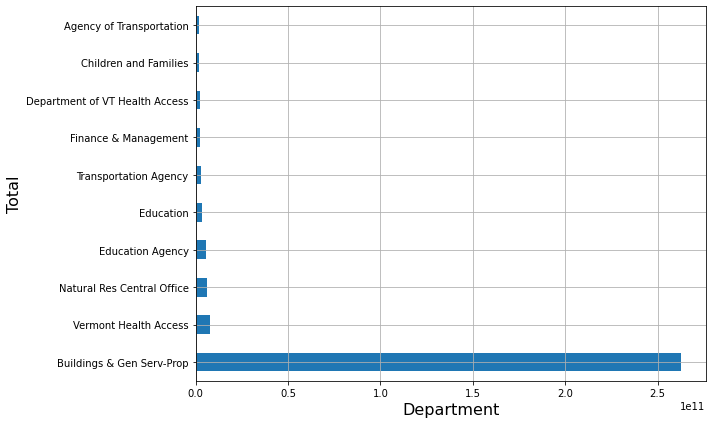

In [21]:
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 10
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
plt.grid()
plt.tight_layout()
plt.savefig('barplot.png')
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


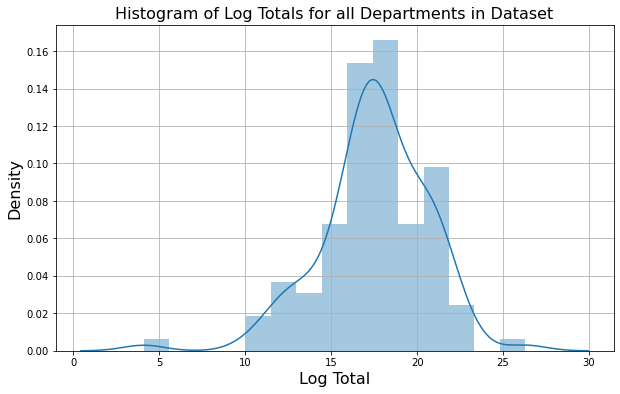

In [22]:
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.grid()
plt.savefig('distplot.png')
plt.show()

In [23]:
df.select('State', 'Amount').show()

+-----+---------+
|State|   Amount|
+-----+---------+
|   VT|1075000.0|
|   VT|   4612.5|
|   VT|112916.67|
|   VT| 17152.74|
|   VT|   4850.0|
|   VT|   1755.0|
|   VT| 26837.54|
|   VT| 30396.35|
|   VT|  5430.17|
|   VT|   1000.0|
|   VT|    787.5|
|   VT|  1233.32|
|   VT| 82819.24|
|   VT| 88205.25|
|   VT| 116250.0|
|   VT|507006.91|
|   VT| 98468.58|
|   VT|287636.15|
|   VT| 62936.47|
|   VT|  11772.5|
+-----+---------+
only showing top 20 rows



In [24]:
plot_df2 = spark.sql(
'''
SELECT State, SUM(Amount) as Total FROM VermontVendor 
GROUP BY State
ORDER BY Total DESC
'''
).toPandas()
plot_df2.head()

,State,Total
0,VT,2.701278e+11
1,MA,2.603788e+10
2,VA,3.444285e+09
3,NH,2.903896e+09
4,PA,2.639595e+09


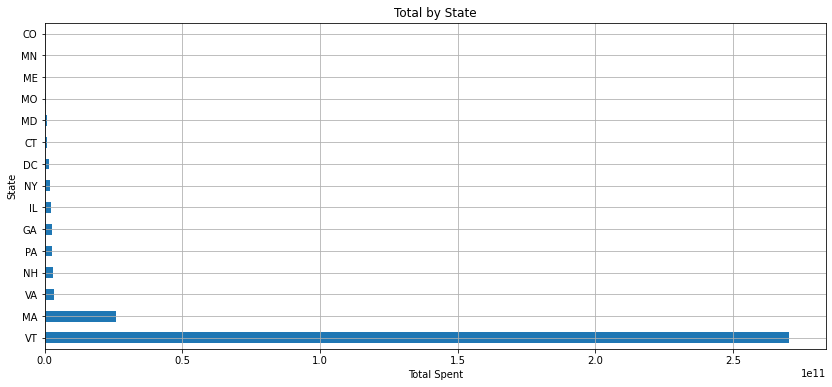

In [25]:
fig, ax = plt.subplots(1,1,figsize = (14, 6))
plot_df2.head(15).plot(x='State', y = 'Total', kind = 'barh', legend = False, ax = ax, color = 'C0')
plt.title('Total by State')
plt.ylabel('State')
plt.xlabel('Total Spent')
plt.grid()
plt.show()

In [26]:
plot_df2 = spark.sql(
'''
SELECT `Quarter Ending` as Date, %s, SUM(Amount) as Total FROM VermontVendor 
GROUP BY State, Date
ORDER BY Total DESC
''' % 'State'
).toPandas()
plot_df2.head()

,Date,State,Total
0,03/31/2010,VT,2.612216e+10
1,12/31/2009,VT,2.203267e+10
2,12/31/2010,VT,1.828065e+10
3,06/30/2012,VT,1.597361e+10
4,09/30/2010,VT,1.481222e+10


In [27]:
states = plot_df2[plot_df2.State.isin(['VT', 'MA', 'NH', 'PA', 'GA'])].copy()
states.Date = pd.to_datetime(states.Date)

In [28]:
# Make sure to provide values parameter
states_pivot = states.pivot_table(index='Date', columns='State', values = 'Total')
states_pivot = states_pivot.reset_index()
states_pivot.head()


State,Date,GA,MA,NH,PA,VT
0,2009-09-30,5670225.01,2.330410e+09,1.529723e+07,4.108724e+06,1.355454e+10
1,2009-12-31,7013393.26,2.329298e+09,1.355553e+07,1.165219e+09,2.203267e+10
2,2010-03-31,5204426.97,2.328200e+09,6.802959e+06,5.857825e+06,2.612216e+10
3,2010-06-30,6938252.50,2.328470e+09,1.172600e+09,5.933583e+06,1.129518e+10
4,2010-09-30,6051967.82,2.330218e+09,1.179103e+09,4.984612e+06,1.481222e+10


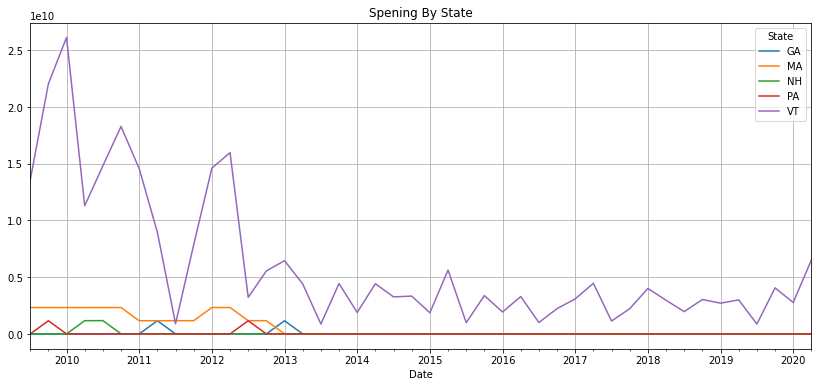

In [29]:
fig, ax = plt.subplots(1,1,figsize = (14, 6))
states_pivot.set_index('Date').plot(ax = ax)
ax.grid()
ax.set_title('Spening By State')
plt.show()

In [30]:
GA = spark.sql(
'''
SELECT `Quarter Ending` as Date, State, Amount, Account FROM VermontVendor 
WHERE State = 'MA'
''' 
).toPandas()
VT = spark.sql(
'''
SELECT `Quarter Ending` as Date, State, Amount, Account FROM VermontVendor 
WHERE State = 'VT'
''' 
).toPandas()

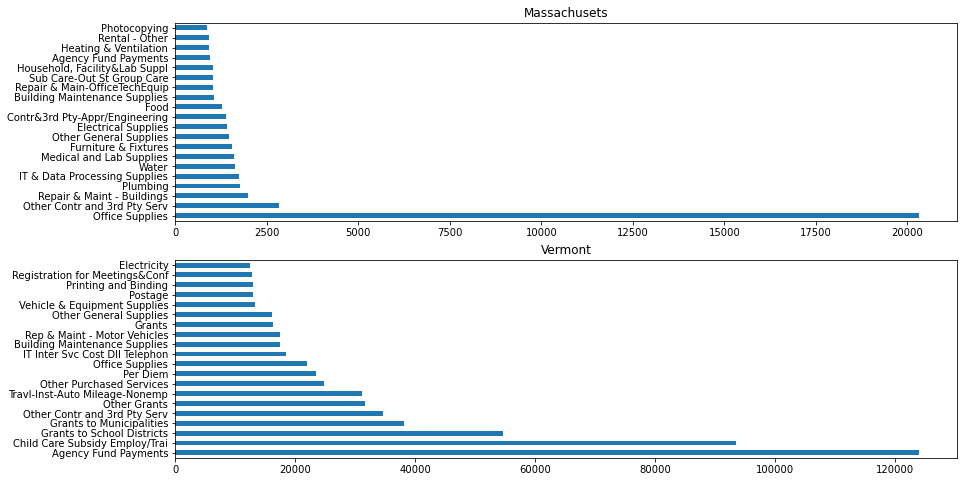

In [31]:

fig, ax = plt.subplots(2,1,figsize = (14,8))
ax = ax.ravel()
GA.Account.value_counts().head(20).plot(kind = 'barh', ax =ax[0], color = 'C0')
ax[0].set_title('Massachusets')
VT.Account.value_counts().head(20).plot(kind = 'barh', ax =ax[1], color = 'C0')
ax[1].set_title('Vermont')
plt.show()

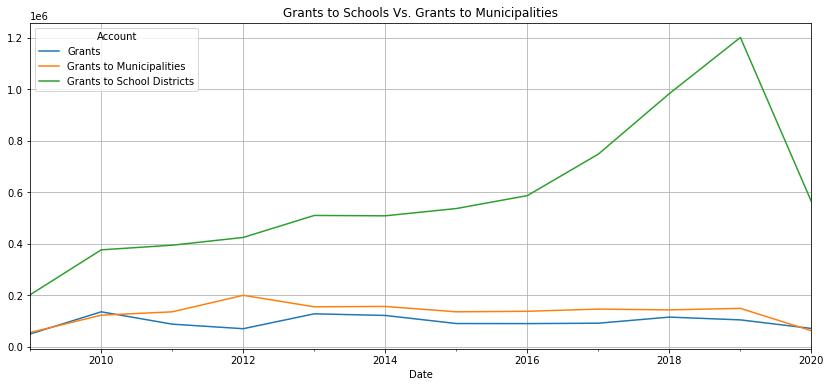

In [32]:
def time_series():
    VT_grants1 = spark.sql(
    '''
    SELECT `Quarter Ending` as Date, State, Amount, Account FROM VermontVendor 
    WHERE State = 'VT' AND (Account = 'Grants to School Districts' OR Account = 'Grants to Municipalities' OR Account = 'Grants')
    ''' 
    ).toPandas()
    VT_grants1['Amount'] = pd.to_numeric(VT_grants1['Amount'])
    VT_grants1['Date'] = pd.to_datetime(VT_grants1['Date'])
    VT_grants = VT_grants1.pivot_table(index='Date', columns='Account', values = 'Amount').reset_index()
    VT_grants = VT_grants.set_index('Date')
    VT_grants = VT_grants.resample('A').sum()
    fig, ax = plt.subplots(1,1,figsize = (14, 6))
    VT_grants.plot(ax = ax)
    plt.title('Grants to Schools Vs. Grants to Municipalities')
    plt.grid()
    plt.show()
time_series()

In [33]:
def time_series():
    import pandas as pd 
    import numpy
    import matplotlib.pyplot as plt 
    from pyspark.sql import SparkSession

    # create sparksession
    spark = SparkSession \
        .builder \
        .appName("Pysparkexample") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
    VT_grants1 = spark.sql(
    '''
    SELECT `Quarter Ending` as Date, State, Amount, Account FROM VermontVendor 
    WHERE State = 'VT' AND (Account = 'Grants to School Districts' OR Account = 'Grants to Municipalities' OR Account = 'Grants')
    ''' 
    ).toPandas()
    VT_grants1['Amount'] = pd.to_numeric(VT_grants1['Amount'])
    VT_grants1['Date'] = pd.to_datetime(VT_grants1['Date'])
    VT_grants = VT_grants1.pivot_table(index='Date', columns='Account', values = 'Amount').reset_index()
    VT_grants = VT_grants.set_index('Date')
    VT_grants = VT_grants.resample('A').sum()
    fig, ax = plt.subplots(1,1,figsize = (14, 6))
    VT_grants.plot(ax = ax)
    plt.title('Grants to Schools Vs. Grants to Municipalities')
    plt.grid()
    plt.show()

In [34]:
Office_supplies = spark.sql(
'''
SELECT `Quarter Ending` as Date, Account, SUM(Amount) as `Office Supplies`, Account FROM VermontVendor 
GROUP BY Date, Account
HAVING Account = 'Office Supplies'
''' 
).toPandas()
Office_supplies['Office Supplies'] = pd.to_numeric(Office_supplies['Office Supplies'])
Office_supplies['Date'] = pd.to_datetime(Office_supplies['Date'])

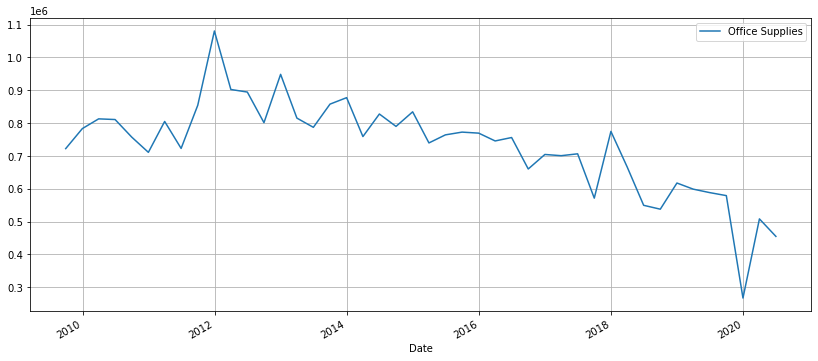

In [35]:
fig, ax = plt.subplots(figsize = (14, 6))
Office_supplies.set_index('Date').plot(ax = ax)
ax.grid()
plt.show()

In [36]:
len(Office_supplies)

44

In [ ]:
from plotnine import *
import plotnine as plotnine
plotnine.options.figure_size = (10, 6)

(ggplot(Office_supplies, aes('Date', 'Office Supplies'))
 + geom_point()
 + geom_smooth(method = 'loess')
 + labs(title = 'Total Spending on Office Supplies by Quarter')
 + theme_minimal()
 + theme(axis_text_x=element_text(rotation=30, hjust=1)))

In [38]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure, output_file, show
from numpy import histogram, linspace
from scipy.stats.kde import gaussian_kde
from bokeh.models import NumeralTickFormatter
import numpy as np
output_notebook()

Loading BokehJS ...

In [39]:
def Histogram(df, col, bins = 30, height = 300,  Density = True, title = "", width = 600, sample = 0.01, *args):
  p = figure(plot_height=height,title = title, plot_width = width, *args)
  
  # plot actual hist for comparison
  X = df.select('Amount').sample(False, 0.01).toPandas().dropna() 
  hist, edges = histogram(X, density=Density, bins=bins)
    
  p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], alpha = 0.6)
  #p.xaxis[0].formatter = NumeralTickFormatter(format="0.00")
  
  output_notebook()
  return(p)

In [40]:
plot = Histogram(df, 'Amount')
show(plot)

Loading BokehJS ...